[*********************100%***********************]  1 of 1 completed


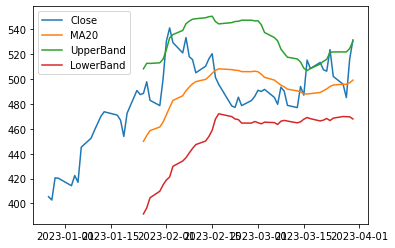

In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock and time period
stock = 'LRCX'
start_date = '2022-12-27'
end_date = '2023-03-31'
# Retrieve the stock data from Yahoo Finance
data = yf.download(stock, start=start_date, end=end_date, group_by='ticker')

# Calculate the 20-day moving average and standard deviation
data['MA20'] = data['Close'].rolling(window=20).mean()
data['SD20'] = data['Close'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
data['UpperBand'] = data['MA20'] + (data['SD20'] * 2)
data['LowerBand'] = data['MA20'] - (data['SD20'] * 2)

# Plot the data and Bollinger Bands
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA20'], label='MA20')
plt.plot(data.index, data['UpperBand'], label='UpperBand')
plt.plot(data.index, data['LowerBand'], label='LowerBand')
plt.legend(loc='upper left')
plt.show()


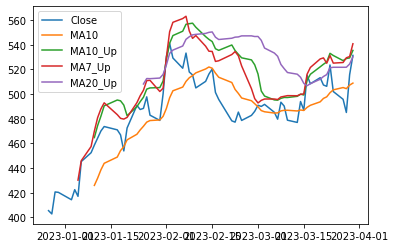

In [9]:
# Calculate the 10-day moving average and standard deviation
data['MA10'] = data['Close'].rolling(window=10).mean()
data['SD10'] = data['Close'].rolling(window=10).std()
data['MA7'] = data['Close'].rolling(window=7).mean()
data['SD7'] = data['Close'].rolling(window=7).std()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['SD20'] = data['Close'].rolling(window=20).std()
# Calculate the upper and lower Bollinger Bands
data['MA10_Up'] = data['MA10'] + (data['SD10'] * 2)
data['MA7_Up'] = data['MA7'] + (data['SD7'] * 2)
data['MA20_Up'] = data['MA20'] + (data['SD20'] * 2)


# Plot the data and Bollinger Bands
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA10'], label='MA10')
plt.plot(data.index, data['MA10_Up'], label='MA10_Up')
plt.plot(data.index, data['MA7_Up'], label='MA7_Up')
plt.plot(data.index, data['MA20_Up'], label='MA20_Up')

plt.legend(loc='upper left')
plt.show()


In [8]:
import pandas as pd
import numpy as np
import yfinance as yf

# Load NVDA price data from Yahoo Finance API
data = yf.download('NVDA', start='2022-01-01', end='2023-03-31')

# Define a function to generate moving averages
def moving_average(df, window):
    return df['Adj Close'].rolling(window=window).mean()

# Define a function to generate Bollinger Bands
def bollinger_bands(df, std):
    ma = df['Adj Close'].rolling(window=20).mean()
    upper_band = ma + std * df['Adj Close'].rolling(window=20).std()
    lower_band = ma - std * df['Adj Close'].rolling(window=20).std()
    return upper_band, lower_band

# Define a function to generate trading signals
def trading_signal(df, window, std):
    ma = moving_average(df, window)
    upper_band, lower_band = bollinger_bands(df, std)
    buy_signal = (df['Adj Close'] < lower_band) & (df['Adj Close'].shift(1) >= lower_band.shift(1))
    sell_signal = (df['Adj Close'] > upper_band) & (df['Adj Close'].shift(1) <= upper_band.shift(1))
    df['Position'] = np.where(buy_signal, 1, np.where(sell_signal, -1, 0))
    df['Position'] = df['Position'].ffill().fillna(0)
    df['Returns'] = df['Adj Close'].pct_change() * df['Position'].shift(1)
    return df['Returns'],df['Returns'].cumsum().iloc[-1]

# Define a function to optimize the parameters
def optimize_parameters(df):
    best_score = -np.inf
    best_params = {}
    for window in range(5, 51, 5):
        for std in np.arange(0.5, 4.0, 0.5):
            _,score = trading_signal(df, window, std)
            if score > best_score:
                best_score = score
                best_params = {'window': window, 'std': std}
    return best_params, best_score

# Call the function to optimize the parameters and print the results
best_params, best_score = optimize_parameters(NVDA)
print('Best parameters:', best_params)
print('Best score:', best_score)


[*********************100%***********************]  1 of 1 completed
Best parameters: {'window': 5, 'std': 2.0}
Best score: 0.029803146846751782


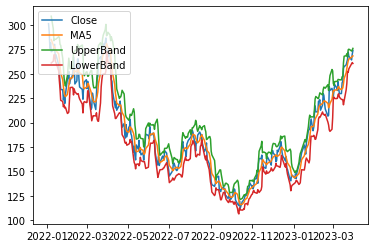

In [4]:
import matplotlib.pyplot as plt
# Calculate the 20-day moving average and standard deviation
data['MA5'] = data['Close'].rolling(window=5).mean()
data['SD5'] = data['Close'].rolling(window=5).std()

# Calculate the upper and lower Bollinger Bands
data['UpperBand'] = data['MA5'] + (data['SD5'] * 2)
data['LowerBand'] = data['MA5'] - (data['SD5'] * 2)

# Plot the data and Bollinger Bands
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA5'], label='MA5')
plt.plot(data.index, data['UpperBand'], label='UpperBand')
plt.plot(data.index, data['LowerBand'], label='LowerBand')
plt.legend(loc='upper left')
plt.show()

In [11]:
ret,_=trading_signal(NVDA, 5, 2.0)
cum_ret=ret.cumsum()

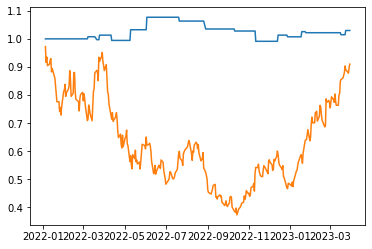

In [18]:
plt.plot(cum_ret+1)
plt.plot((1+NVDA['Adj Close'].pct_change()[1:]).cumprod())